In [25]:
import numpy as np
import pandas as pd

from tvDatafeed import TvDatafeed, Interval

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [26]:
tv = TvDatafeed()

# portfolio of stocks
stocks = ['LULU', 'ADBE', 'PYPL', 'NKE', 'MC']

num_stocks = len(stocks)

from datetime import datetime

# days calculation
start_date = datetime(2010, 1, 1)
today = datetime.now()
days_difference = (today - start_date).days

n_bars = min(days_difference + 100, 5000)  # max 5000 bars API limit

In [27]:
# Exchange mapping
stock_exchanges = {
    'LULU': 'NASDAQ',
    'ADBE': 'NASDAQ',
    'PYPL': 'NASDAQ',
    'NKE': 'NYSE',
    'MC': 'EURONEXT'
}

# Download function with retry and error handling
def download_with_retry(symbol, exchange, retries=3, delay=2):
    for attempt in range(retries):
        try:
            print(f"Downloading {symbol} from {exchange} (attempt {attempt+1})")
            data = tv.get_hist(
                symbol=symbol, 
                exchange=exchange, 
                interval=Interval.in_daily,
                n_bars=1000  # circa 4 anni di dati
            )
            if data is not None and not data.empty:
                print(f"✅ {symbol}: {len(data)} rows downloaded")
                return data
        except Exception as e:
            print(f"❌ Error downloading {symbol}: {e}")
        
        if attempt < retries - 1:
            time.sleep(delay)
    
    print(f"❌ Failed to download {symbol} after {retries} attempts")
    return None

In [28]:
# Download to DataFrame
print("🚀 Starting data download...")
data_dict = {}
failed_downloads = []

for stock, exchange in stock_exchanges.items():
    data = download_with_retry(stock, exchange)
    if data is not None:
        # keep only the Close and Volume columns and rename them
        data_dict[stock] = data[['close', 'volume']].rename(
            columns={'close': f'{stock}_close', 'volume': f'{stock}_volume'}
        )
    else:
        failed_downloads.append(stock)

if failed_downloads:
    print(f"⚠️ Failed to download: {failed_downloads}")

# Combine into a single DataFrame
if data_dict:
    df = pd.concat(data_dict.values(), axis=1)
    print(f"📊 Combined DataFrame shape: {df.shape}")
    print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
    print("\nFirst 5 rows:")
    print(df.head())
else:
    print("❌ No data downloaded successfully")

🚀 Starting data download...
✅ LULU: 1000 rows downloaded
✅ ADBE: 1000 rows downloaded
✅ PYPL: 1000 rows downloaded
✅ NKE: 1000 rows downloaded
✅ MC: 1000 rows downloaded
📊 Combined DataFrame shape: (2000, 10)
📅 Date range: 2021-08-30 16:30:00 to 2025-08-22 16:30:00

First 5 rows:
                     LULU_close  LULU_volume  ADBE_close  ADBE_volume  \
datetime                                                                
2021-08-30 16:30:00      414.52     857947.0      665.99    1341472.0   
2021-08-31 16:30:00      400.17    1275483.0      663.70    1877807.0   
2021-09-01 16:30:00      395.53     966304.0      665.89    1261172.0   
2021-09-02 16:30:00      388.37     884521.0      664.64    1403452.0   
2021-09-03 16:30:00      388.33     712426.0      666.59    1641621.0   

                     PYPL_close  PYPL_volume  NKE_close  NKE_volume  MC_close  \
datetime                                                                        
2021-08-30 16:30:00      288.47   14631047.0 

In [29]:
# download data to csv
df.to_csv("stock_data.csv")

In [30]:
# read data from csv
df = pd.read_csv("stock_data.csv", index_col=0, parse_dates=True)

In [31]:
df.head()

,LULU_close,LULU_volume,ADBE_close,ADBE_volume,PYPL_close,PYPL_volume,NKE_close,NKE_volume,MC_close,MC_volume
datetime,,,,,,,,,,
2021-08-30 16:30:00,414.52,857947.0,665.99,1341472.0,288.47,14631047.0,168.03,3537067.0,NaN,NaN
2021-08-31 16:30:00,400.17,1275483.0,663.70,1877807.0,288.66,8911799.0,164.74,7545629.0,NaN,NaN
2021-09-01 16:30:00,395.53,966304.0,665.89,1261172.0,286.75,5568281.0,164.56,4706527.0,NaN,NaN
2021-09-02 16:30:00,388.37,884521.0,664.64,1403452.0,285.53,4647112.0,163.67,4632856.0,NaN,NaN
2021-09-03 16:30:00,388.33,712426.0,666.59,1641621.0,289.13,5287970.0,163.29,4254656.0,NaN,NaN


In [32]:
# count nan
nan_counts = df.isna().sum()
print("NaN counts per column:")
print(nan_counts[nan_counts > 0])

NaN counts per column:
LULU_close     1000
LULU_volume    1000
ADBE_close     1000
ADBE_volume    1000
PYPL_close     1000
PYPL_volume    1000
NKE_close      1000
NKE_volume     1000
MC_close       1000
MC_volume      1000
dtype: int64


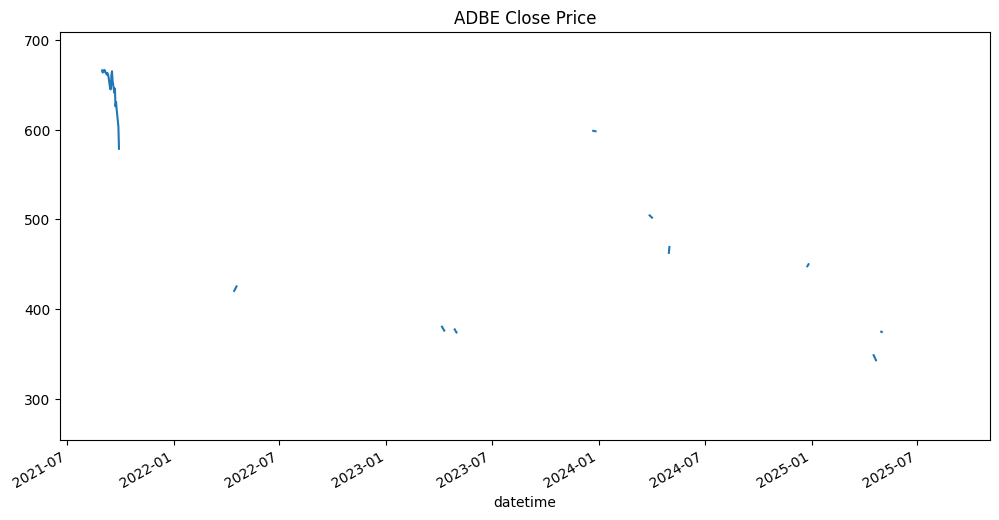

In [33]:
# plot ADBE_close
df['ADBE_close'].plot(title='ADBE Close Price', figsize=(12, 6));
